<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/analisecovidbsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Análise dos dados - COVID - Brasília
**ÚLTIMA ATUALIZAÇÃO 01/07/2020**

O Distrito Federal foi um dos entes da federação que começaram cedo com as medidas de isolamento social. 

Passados 3 meses desde o primeiro caso de covid na capital, na primeira semana de março, Brasília tem forte queda nas taxas de isolamento social.

O governo julgou seguro a retomada das atividades e foi gradativamente liberando a reabertura, com algumas restrições, do comércio essencial, dos parques, dos clubes e das igrejas, deixando por último a reabertura de bares, restaurantes e academias, consideradas atividades não essenciais.

Diante do cenário, analisaremos os dados sobre o **corona vírus** e veremos quais informações podemos extrair dos dados brutos disponibilizados pelo governo do Distrito Federal.

O estudo será atualizado semanalmente.


##Obtenção de dados
Os utilizados na presente análise foram extraídos do [site do GDF](https://covid19.ssp.df.gov.br/extensions/covid19/covid19.html#/) destinado às informações referentes ao **COVID**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt

%matplotlib inline

In [ ]:
df = pd.read_excel("/content/dados-abertos (2).xlsx")

## Dicionário de variáveis
* id - número gerado para identificar o paciente
* Sexo - gênero do paciente
* Faixa etária - faixa de idade do paciente
* Estado de saúde - estado que se encontra o paciente identificado
* Comorbidades - identifica se o paciente possui comorbidades
* RA - Região Administrativa
* Data - data de importação dos dados
* Data Cadastro - data do cadastramento ou atualização dos dados do paciente

Dentre as comorbidades, são identificadas em variáveis separadas: Pneumopatia, Nefropatia, Doença Hematológica, Distúrbios metabólicos, Imunopressão, Obesidade, Cardiovasculopatia e Outros.

### A seguir, observemos um pedaço-resumo do dataframe, analisando as 5 primeiras entradas:

In [ ]:
df.head(5)

,id,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Estado de Saúde,Comorbidades,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia
0,1,2020-06-30,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-06-30,2020-03-18,Masculino,50 a 59 anos,Lago Sul,DISTRITO FEDERAL,Recuperado,Sim,Sim,Não,Não,Sim,Não,Não,Não,Não
2,3,2020-06-30,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Recuperado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,2020-06-30,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Recuperado,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim
4,8,2020-06-30,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visão geral dos dados

Os dados possuem 49.217 entradas e 17 variáveis.
Quando observamos os dados da tabela verificamos que existem campos para diferentes comorbidades. 

Para facilitar a análise, criamos uma entrada denominada "Comorbidades" que aponta se há ou não qualquer tipo de comorbidade apresentada pelo paciente, ou se o valor não foi informado.

Todas as variáveis, com exceção das datas, são do tipo "object", ou seja, do tipo string.



In [ ]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 49217
Variáveis:	 17



id                                 int64
Data                      datetime64[ns]
Data Cadastro             datetime64[ns]
Sexo                              object
Faixa Etária                      object
RA                                object
UF                                object
Estado de Saúde                   object
Comorbidades                      object
Pneumopatia                       object
Nefropatia                        object
Doença Hematológica               object
Distúrbios Metabólicos            object
Imunopressão                      object
Obesidade                         object
Outros                            object
Cardiovasculopatia                object
dtype: object

## Nulls
A maior parte dos valores em branco se relacionam com as informações sobre Comorbidades do paciente. Observa-se que quando há uma comorbidade, as outras comorbidades listadas são, geralmente, preenchidas com "sim" ou "não", e na maioria dos casos, não é informado se há ou não comorbidades.

Uma hipótese é a de que quando registrada uma comorbidade, se avaliam as outras e se não há comorbidade, os valores ficam em branco.

Em relação as informações sobre o estado de saúde do paciente, apesar de não conter valores nulos, a maior parte do valor é dado como "não informado".

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Doença Hematológica       0.993356
Nefropatia                0.990105
Imunopressão              0.988033
Obesidade                 0.986509
Pneumopatia               0.978747
Distúrbios Metabólicos    0.961964
Cardiovasculopatia        0.944572
Outros                    0.894122
UF                        0.014548
Data Cadastro             0.000975
Sexo                      0.000000
Data                      0.000000
Comorbidades              0.000000
Faixa Etária              0.000000
RA                        0.000000
Estado de Saúde           0.000000
id                        0.000000
dtype: float64

## Análise exploratória dos dados

### Regiões do DF
Ceilândia é a cidade com mais casos de corona vírus, representando 13% dos pacientes diagnosticados. A Região administrativa é seguida em maiores números de casos pelo Plano Piloto e Taguatinga, ambos com 7% dos casos.

As regiões do Pôr do Sol, Candangolândia, Sobradinho II,  Arniqueira, Varjão, SIA e Fercal representam os locais com menos casos. 

Observa-se que dado ao fato das regiões estarem predominantemente classificadas como regiões de baixa renda, segundo dados da Codeplan 2018, pode haver subnotificação de casos.

Segundos os dados da Codeplan(2018), as regiões de classificam da seguinte maneira:

• **Grupo 1 (alta renda)**: Plano Piloto, Jardim Botânico, Lago Norte, Lago Sul, Park Way e Sudoeste/Octogonal, com renda domiciliar de R$ 15.622

• **Grupo 2 (média-alta renda)**: Águas Claras, Candangolândia, Cruzeiro, Gama, Guará, Núcleo
Bandeirante, Sobradinho, Sobradinho II, Taguatinga e Vicente Pires, com renda domiciliar média de R$ 7.266;

• **Grupo 3 (média-baixa renda)**: Brazlândia, Ceilândia, Planaltina, Riacho Fundo, Riacho Fundo
II, SIA, Samambaia, Santa Maria e São Sebastião, com renda domiciliar média de R$ 3.101;

• **Grupo 4 (baixa renda)**: Fercal, Itapoã, Paranoá, Recanto das Emas, SCIA–Estrutural e Varjão, com renda domiciliar média de R$
2.472;



In [ ]:
df.RA.value_counts() / df.shape[0]


Ceilândia                0.131235
Plano Piloto             0.070057
Samambaia                0.069529
Taguatinga               0.069285
Entorno DF               0.054189
Gama                     0.048500
Não Informado            0.044558
Outros Estados           0.041815
Paranoá                  0.039702
Guará                    0.037446
Sobradinho               0.034866
Águas Claras             0.034196
Santa Maria              0.033586
São Sebastião            0.031839
Planaltina               0.031188
Sistema Penitenciário    0.027389
Recanto das Emas         0.026861
Riacho Fundo             0.019729
Itapoã                   0.016417
Brazlândia               0.013532
Sudoeste/Octogonal       0.013369
Lago Sul                 0.012679
Vicente Pires            0.012557
SCIA                     0.012496
Jardim Botânico          0.011520
Riacho Fundo II          0.008432
Lago Norte               0.008026
Núcleo Bandeirante       0.007985
Cruzeiro                 0.007396
Candangolândia

###Gênero
Em relação ao gênero dos paciêntes com Covid, observa-se que não há diferença de gênero em relação a quantidade de infectados, sendo aproximadamente 51% dos infectadosdo sexo feminino e 49% do sexo masculino, conforme o Gráfico 1.

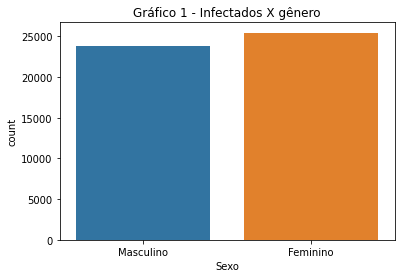

Feminino     0.516813
Masculino    0.483187
Name: Sexo, dtype: float64

In [ ]:
sns.countplot(df['Sexo'])
plt.title('Gráfico 1 - Infectados X gênero')
plt.show()
df.Sexo.value_counts() / df.shape[0]

##Faixa Etária
A faixa etária nos demonstra que há menor número de casos notificados entre os menores de 19 anos e maiores de 60 anos. Portanto, o maior número de infecções fica por dentro dessa faixa etária, conforme observado no Gráfico 2.


30 a 39 anos    13367
40 a 49 anos    11044
20 a 29 anos     9371
50 a 59 anos     6808
>= 60 anos       5264
<= 19 anos       3363
Name: Faixa Etária, dtype: int64

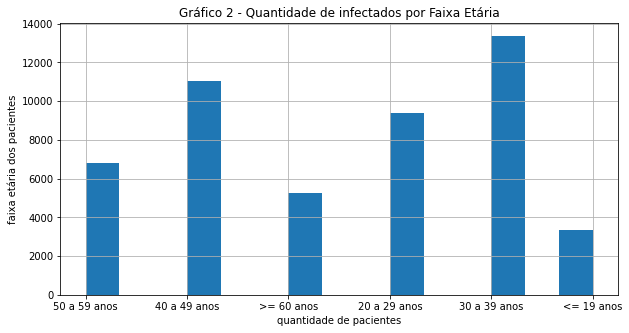

In [ ]:

df['Faixa Etária'].hist(bins=15, figsize=(10,5))
plt.xlabel('quantidade de pacientes')
plt.ylabel('faixa etária dos pacientes')
plt.title('Gráfico 2 - Quantidade de infectados por Faixa Etária')
df['Faixa Etária'].value_counts()


##Estado de saúde
Analisando o número de óbitos, notamos que este representa aproximadamente 1% dos pacientes. Porém, observa-se que 29% dos pacientes estão com seu estado de saúde não informado, podendo ocorrer subnotificação, conforme evidenciado no Gráfico 3.

Recuperado       0.690209
Não Informado    0.295203
Óbito            0.011927
Moderado         0.001565
Grave            0.000752
Leve             0.000345
Name: Estado de Saúde, dtype: float64

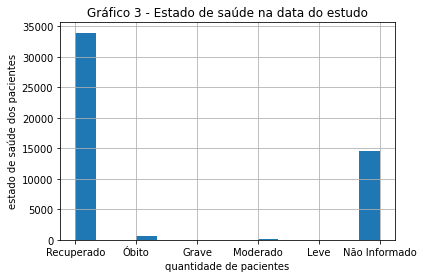

In [ ]:
df['Estado de Saúde'].hist(bins=15)
plt.xlabel('quantidade de pacientes')
plt.ylabel('estado de saúde dos pacientes')
plt.title('Gráfico 3 - Estado de saúde na data do estudo')
df['Estado de Saúde'].value_counts() / df['Estado de Saúde'].shape[0]

##Óbitos
Observa-se que o número de óbitos é maior no sexo masculino, representando 348 óbitos de homens (59%), em 29 de junho.
É uma questão que precisaria de maior investigação visto que a idade dos pacientes não influenciou no número de óbitos por gênero, conforme evidenciado nos Gráficos 4 e 5.

Observa-se também que apesar dos idosos (pacientes > 60 anos) serem apenas 10% dos pacientes totais, estes representam aproximadamente 72% dos óbitos, mostrando que há um **alto risco de mortalidade** nessa faixa etária, conforme evidenciado no Gráfico 6.

In [ ]:
df1 = df[df["Estado de Saúde"] == "Óbito"]

In [ ]:
df1.Sexo.value_counts()

Masculino    348
Feminino     239
Name: Sexo, dtype: int64

In [ ]:
df1.Sexo.value_counts() / df1.Sexo.shape[0]

Masculino    0.592845
Feminino     0.407155
Name: Sexo, dtype: float64

In [ ]:
df9 = df1[df1["Sexo"] == "Feminino"]

>= 60 anos      0.782427
50 a 59 anos    0.100418
40 a 49 anos    0.079498
30 a 39 anos    0.029289
20 a 29 anos    0.004184
<= 19 anos      0.004184
Name: Faixa Etária, dtype: float64

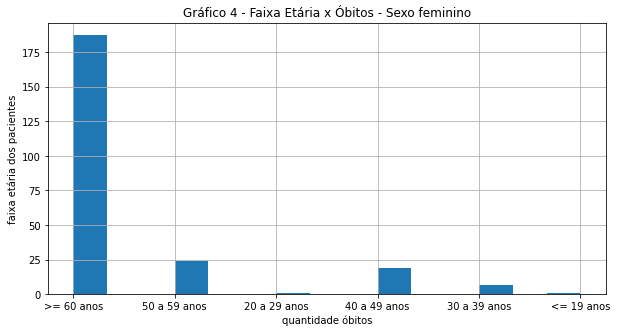

In [ ]:
df9['Faixa Etária'].hist(bins=15, figsize=(10,5))
plt.xlabel('quantidade óbitos')
plt.ylabel('faixa etária dos pacientes')
plt.title('Gráfico 4 - Faixa Etária x Óbitos - Sexo feminino');
df9['Faixa Etária'].value_counts() / df9['Faixa Etária'].shape[0]

>= 60 anos      0.782427
50 a 59 anos    0.100418
40 a 49 anos    0.079498
30 a 39 anos    0.029289
20 a 29 anos    0.004184
<= 19 anos      0.004184
Name: Faixa Etária, dtype: float64

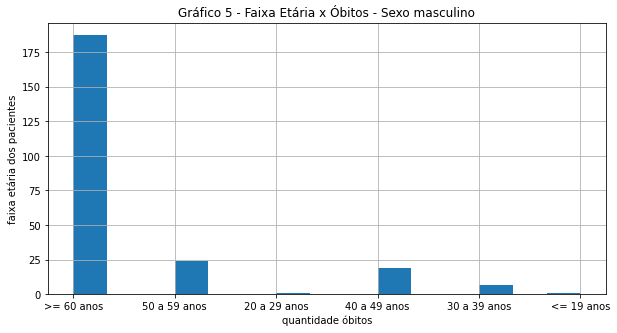

In [ ]:
df10= df1[df1["Sexo"] == "Masculino"]
df9['Faixa Etária'].hist(bins=15, figsize=(10,5))
plt.xlabel('quantidade óbitos')
plt.ylabel('faixa etária dos pacientes')
plt.title('Gráfico 5 - Faixa Etária x Óbitos - Sexo masculino');
df9['Faixa Etária'].value_counts() / df9['Faixa Etária'].shape[0]

>= 60 anos      0.725724
50 a 59 anos    0.136286
40 a 49 anos    0.085179
30 a 39 anos    0.040886
20 a 29 anos    0.008518
<= 19 anos      0.003407
Name: Faixa Etária, dtype: float64

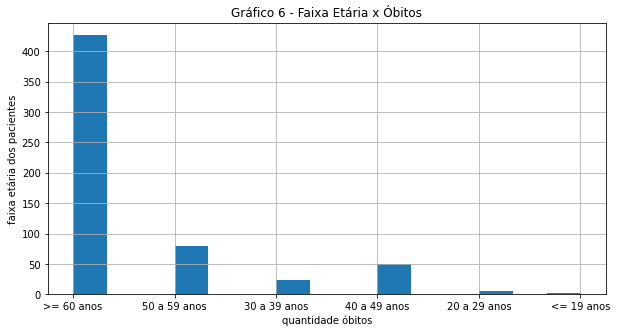

In [46]:
df1['Faixa Etária'].hist(bins=15, figsize=(10,5))
plt.xlabel('quantidade óbitos')
plt.ylabel('faixa etária dos pacientes')
plt.title('Gráfico 6 - Faixa Etária x Óbitos');
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]

##Comorbidades X Óbitos
Em relação aos óbitos, o Gráfico 7 mostra que 88% dos pacientes que vieram a falecer possuiam algum tipo de comorbidade.

A análise ainda mostra que a maioria sofria das comorbidades do tipo "Distúrbios Metabólicos" e "Cardiovasculopatia",  conforme observado no Gráfico 8.

Cumpre destacar que esses pacientes podiam possuir 1 ou mais tipos de comorbidades.

In [ ]:
df2 = df1[df1["Comorbidades"] == "Sim"]

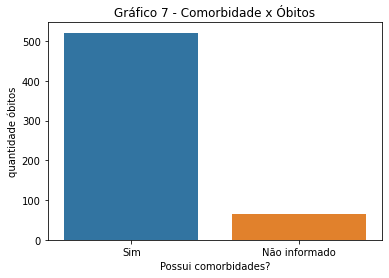

Sim              0.887564
Não informado    0.112436
Name: Comorbidades, dtype: float64

In [48]:

sns.countplot(df1['Comorbidades'])
plt.xlabel('Possui comorbidades?')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 7 - Comorbidade x Óbitos')
plt.show();
df1.Comorbidades.value_counts()/df1.Comorbidades.shape[0]


In [ ]:
df3 = df2.iloc[:,8:]

In [ ]:
df4 = df3.fillna('Não')

In [ ]:
df5 = df4.replace(["Sim"], 1)

In [ ]:
df6 = df5.replace(["Não"],0 )

In [ ]:
df7= df6.drop(columns="Comorbidades")

In [ ]:
df7.sum()

Pneumopatia                86
Nefropatia                 47
Doença Hematológica         9
Distúrbios Metabólicos    213
Imunopressão               62
Obesidade                  73
Outros                     98
Cardiovasculopatia        359
count                     521
dtype: int64

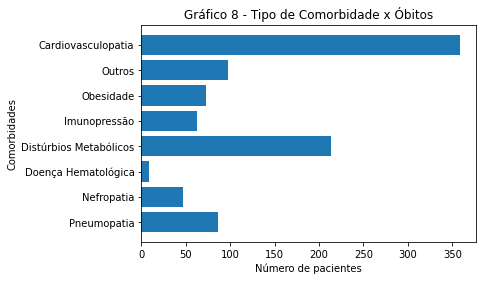

In [53]:
disease = ['Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia']
n_disease = [86,47,9,213,62,73,98,359]

plt.barh(disease, n_disease);
plt.xlabel('Número de pacientes')
plt.ylabel('Comorbidades')
plt.title('Gráfico 8 - Tipo de Comorbidade x Óbitos');

##Análise temporal

Em relação a quantidade de infectados, a análise dos dados sugere ainda uma tendência de crescimento, concomitante com o crescimento de óbitos, conforme evidenciado nos Gráficos 9 e 10.



In [ ]:
df8 = df

In [ ]:
df8['Pacientes'] = 1

In [ ]:
df8['Mês'] = df8['Data'].dt.month

In [ ]:
df8.index = df8['Data Cadastro']

2020-06-29    2910
2020-06-28    2555
2020-06-18    2295
2020-06-16    2159
2020-06-26    2049
              ... 
2020-04-14      10
2020-04-08       8
2020-03-17       1
2020-03-16       1
2020-03-01       1
Name: Data Cadastro, Length: 108, dtype: int64

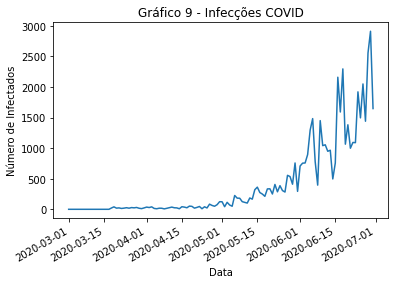

In [55]:
df8['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de Infectados")
plt.title('Gráfico 9 - Infecções COVID')
df8['Data Cadastro'].value_counts() 

2020-06-23    21
2020-06-30    19
2020-06-22    19
2020-06-15    18
2020-05-31    17
              ..
2020-04-12     1
2020-04-23     1
2020-04-19     1
2020-05-01     1
2020-04-13     1
Name: Data Cadastro, Length: 79, dtype: int64

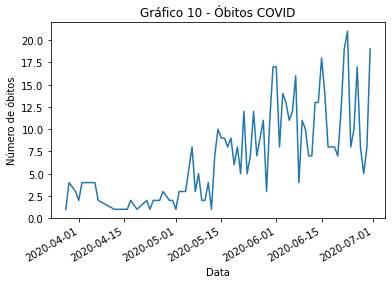

In [57]:
df1['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.title('Gráfico 10 - Óbitos COVID')
df1['Data Cadastro'].value_counts() 



##Conclusões
No recente cenário de pandemia mundial, Brasília também se encontra em número crescente de infectados e óbitos.

Nesse estudo, observamos que o número de óbitos é maior entre os que possuem comorbidades (88%) e apesar do fato de a faixa Etária dos infectados com idade acima de 60 anos representar 10% dos infectados totais, eles representam 72% dos óbitos.

Também observou-se que apesar dos números de infectados serem semelhantes entre homens e mulheres, os homens vão mais a óbito, representando 59% dos falecimentos.

Dentre as comorbidades que estão mais relacionadas com os óbitos estão a Cardiovasculopatia e os Distúrbios Metabólicos.

Nota-se também que há grande quantidade de "Estados de saúde" não informados, aproximadamente 29% dos pacientes, podendo indicar subnotificação.

Este estudo demonstra algumas análises que se pode extrair dos dados brutos abertos disponibilizados pelo Governo do Distrito Federal.

Esse estudo será atualizado semanalmente.

Carmen Scartezini, Accountant & Data Science Student.